In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [3]:
G = nx.generators.community.stochastic_block_model(
    [10, 7, 7, 4],
    np.clip(np.array([[.3, .01, .02, .01],
     [.01, .03, .01, .1],
     [.02, .01, .4, .0],
     [.01, .1, .0, .2],]) + 0.02 + 0.5 * np.eye(4), 0, 1), seed=1338,
)
pos = nx.spring_layout(G, seed=1337)
np.random.seed(1337)
pos = {
    k : v + 0.03 * np.random.randn(2) for k, v in pos.items()
}

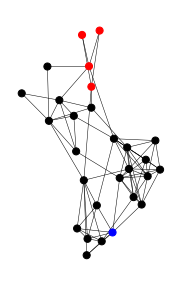

In [4]:
node_color = []
for v in G.nodes:
    if v in G.graph['partition'][-1]:
        node_color.append('red')
    elif v == 22:
        node_color.append('blue')
    else:
        node_color.append('black')

fig, ax = plt.subplots(figsize=(3, 5))
nx.draw(G, {v : (p[1] * 0.3, p[0]) for v, p in pos.items()}, 
        node_color=node_color, 
        width=.5, node_size=50, ax=ax)

fig.savefig('../thesis_nbs/overview_plots/graph.pdf')

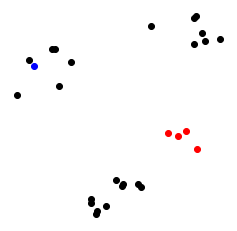

In [5]:
np.random.seed(1337)
means = np.array([
    [-.1, -.5],
    [.2,  .5],
    [-.3, .3],
    [.1, -.2],
]) * 0.6
fig, ax = plt.subplots(figsize=(4, 4))
covs = np.array([np.diag(np.random.rand(2)) + 0.1 for _ in range(4)]) * 0.005
for label, partition in enumerate(G.graph['partition']):
    for v in partition:
        xy = np.random.multivariate_normal(means[label], covs[label], 1)[0]
        ax.scatter([xy[0]], [xy[1]], c=node_color[v])
        
ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])

fig.savefig('../thesis_nbs/overview_plots/latent.pdf')

(200, 200, 2)


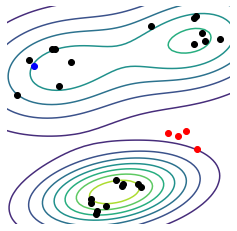

In [6]:
from scipy.stats import multivariate_normal

np.random.seed(1337)
means = np.array([
    [-.1, -.5],
    [.2,  .5],
    [-.3, .3],
    [.1, -.2],
]) * 0.6
fig, ax = plt.subplots(figsize=(4, 4))
covs = np.array([np.diag(np.random.rand(2)) + 0.1 for _ in range(4)]) * 0.005
for label, partition in enumerate(G.graph['partition']):
    for v in partition:
        xy = np.random.multivariate_normal(means[label], covs[label], 1)[0]
        ax.scatter([xy[0]], [xy[1]], c=node_color[v])
        
x_lim = ax.get_xlim()
y_lim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(-1, 1, 200), np.linspace(-1, 1, 200))
xxyy = np.dstack((xx, yy))
print(xxyy.shape)
densities = np.zeros_like(xx)


for idx, (mean, cov) in enumerate(list(zip(means, covs))):
    if idx < covs.shape[0] - 1:
        densities += (multivariate_normal(mean, cov * 7).pdf(xxyy))
    
ax.contour(xx, yy, densities, zorder=-1)
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)

ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])

fig.savefig('../thesis_nbs/overview_plots/latent-density.pdf')


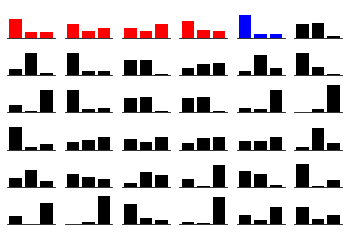

In [49]:
import scipy
fig, axs = plt.subplots(6, 6)


n = axs.flatten().shape[-1]
p = np.random.randn(n, 3)
colors = ['red'] * 4 + ['blue'] + ['black'] * (n - 4 - 1)
np.random.seed(1337)


for ax, p_i, col in zip(axs.flatten(), p, colors):
    
    if col == 'black':
        p_i *= 1.3
    elif col == 'red':
        p_i *= 0.5
    elif col == 'blue':
        p_i *= 2
    
    ax.bar(range(len(p_i)), scipy.special.softmax(p_i), color=col)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylim(0, 1)

    
    
fig.savefig('../thesis_nbs/overview_plots/scores.pdf')

red 0.6661782202165782 0.9232122972517803
red 0.6664507106053928 0.8763464192839662
red 0.6664522943394028 0.8644987032912512
red 0.666295115391534 0.9995391758291043
blue 0.0 0.8780975177280815
black 0.32002292862040793 0.2645234572207037
black 9.95621732613472e-07 0.06305320575658624
black 7.388751022130435e-08 0.01658958856740489
black 0.4687970999220321 0.08708634664941295
black 0.3143953661923842 0.21890571769344136
black 8.682966779138823e-06 0.11298542492088182
black 3.498703046145302e-05 0.20203796783330086
black 6.040989312228184e-06 0.31541143340895517
black 7.571765148206566e-08 0.011509544014928874
black 0.30751276641770176 0.5361548612755855
black 0.30066459983667404 0.3163122886684804
black 1.0628963809100611e-07 0.2859389501055336
black 1.1467804483800137e-10 0.4483220514652685
black 5.09547240734598e-07 0.05467487475862565
black 0.07275255900038624 0.4532650132452085
black 0.09774817222261678 0.19783400480220037
black 0.42839826956431803 0.5513548621822673
black 0.02960

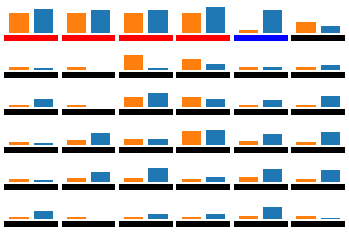

In [58]:

fig, axs = plt.subplots(6, 6)

np.random.seed(1337)
epi = np.random.randn(n, 4)

for ax, p_i, epi_i, col in zip(axs.flatten(), p, epi, colors):
    
    
    if col == 'black':
        p_i *= 1.3
        epi_i = 1 - scipy.special.softmax(3 * epi_i).max()
    elif col == 'red':
        p_i *= .5
        epi_i = scipy.special.softmax(15 * epi_i).max()
    elif col == 'blue':
        p_i *= 2
        epi_i = scipy.special.softmax(5 * epi_i).max()
    
    p_i = scipy.special.softmax(p_i)
    p_i = 1 - p_i.max()
    
    print(col, p_i, epi_i)
    
    
    ax.bar([0, 1], [p_i + 0.1, epi_i], color=['tab:orange', 'tab:blue'])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color(col)
    ax.spines['bottom'].set_linewidth(6)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylim(-.2, 1)

    
    
fig.savefig('../thesis_nbs/overview_plots/proxy.pdf')